# Movie Recommender System Project
## IMDB Scraping using OMDB API
>Eve Ben Ezra

The following notebook contains code for scraping IMDB using the OMDBAPI - http://www.omdbapi.com/

The movies I've chosen to scrape are the movies available with data pulled from them from the MovieLens 20M dataset, available here: https://grouplens.org/datasets/movielens/20m/

The movies were scraped based on similar IMDB IDs, in two groups as the MovieLens dataset was missing the leading 'tt0' or 'tt00' of the ID. 

I chose to scrape these particular movies for plot data, as well as other aspects of the movies that are unavailable in the grouplens dataset, such as director, actors, release year, box office, and more. Hopefully this information will help me with my recommender system.

In [ ]:
# https://buildmedia.readthedocs.org/media/pdf/omdbpy/latest/omdbpy.pdf

import omdb
from omdb import OMDBClient
client = OMDBClient(apikey=APIKEY)

In [2]:
# if using the module level client
omdb.set_default('apikey', APIKEY)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

%matplotlib inline

In [34]:
links = pd.read_csv('/Users/user/movielens-20m-dataset/link.csv')
movie_info = pd.read_csv('/Users/user/movielens-20m-dataset/movie.csv')

In [35]:
movies = pd.merge(links, movie_info, on="movieId")
movies.head()

,movieId,imdbId,tmdbId,title,genres
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy
2,3,113228,15602.0,Grumpier Old Men (1995),Comedy|Romance
3,4,114885,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,113041,11862.0,Father of the Bride Part II (1995),Comedy


In [36]:
# Get the full imbd ID

movies['full_imdbid'] = movies['imdbId'].apply(lambda x: 'tt0' + str(x))

In [8]:
movies.shape

(27278, 6)

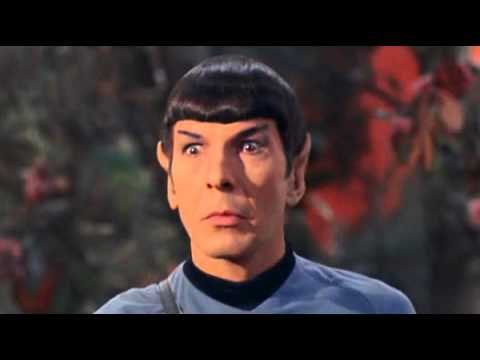

In [10]:
movie = omdb.imdbid('tt0114709', tomatoes=False, timeout=5)
df = pd.DataFrame.from_dict(movie)
    
for Id in movies.full_imdbid:
    movie = omdb.imdbid(Id, tomatoes=False, timeout=5)
    movie_set  = pd.DataFrame(movie, columns=movie.keys())
    df = pd.concat([df, movie_set], axis =0, sort=False)
    
    
#play lenord Nemoy saying "beep" for 4 hours
from IPython.display import YouTubeVideo
YouTubeVideo("BE9b3IdTCiY",autoplay=True)

In [12]:
df.shape

(35976, 29)

In [13]:
df = df.drop_duplicates(subset='title')

In [15]:
df.shape

(16876, 29)

In [20]:
movies.head()

,movieId,imdbId,tmdbId,title,genres,full_imdbid
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,tt0114709
1,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy,tt0113497
2,3,113228,15602.0,Grumpier Old Men (1995),Comedy|Romance,tt0113228
3,4,114885,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance,tt0114885
4,5,113041,11862.0,Father of the Bride Part II (1995),Comedy,tt0113041


In [38]:
# Extract 'year' from movies dataframe

movies['year'] = movies['title'].str.extract('(\d{4})')

In [39]:
# Get rid of the year in the 'title' section

movies['title'] = movies['title'].str.replace('\(\d{4}\)','')
movies.head()

,movieId,imdbId,tmdbId,title,genres,full_imdbid,year
0,1,114709,862.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,tt0114709,1995
1,2,113497,8844.0,Jumanji,Adventure|Children|Fantasy,tt0113497,1995
2,3,113228,15602.0,Grumpier Old Men,Comedy|Romance,tt0113228,1995
3,4,114885,31357.0,Waiting to Exhale,Comedy|Drama|Romance,tt0114885,1995
4,5,113041,11862.0,Father of the Bride Part II,Comedy,tt0113041,1995


In [51]:
movies['title'] = movies['title'].str.strip()
movies.head()

,movieId,imdbId,tmdbId,title,genres,full_imdbid,year,Match
0,1,114709,862.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,tt0114709,1995,0
1,2,113497,8844.0,Jumanji,Adventure|Children|Fantasy,tt0113497,1995,0
2,3,113228,15602.0,Grumpier Old Men,Comedy|Romance,tt0113228,1995,0
3,4,114885,31357.0,Waiting to Exhale,Comedy|Drama|Romance,tt0114885,1995,0
4,5,113041,11862.0,Father of the Bride Part II,Comedy,tt0113041,1995,0


In [64]:
# Compare the two dataframes to see which movies we're missing

values = set(df['imdb_id'])

movies['Match'] = movies['full_imdbid'].isin(values).astype(int)

In [65]:
movies['Match'].value_counts()

0    15668
1    10548
Name: Match, dtype: int64

In [66]:
missing = movies[movies['Match'] == 0]

In [67]:
missing.head() 

,movieId,imdbId,tmdbId,title,genres,full_imdbid,year,Match
109,111,75314,103.0,Taxi Driver,Crime|Drama|Thriller,tt075314,1976,0
140,142,94878,NaN,Shadows (Cienie),Drama,tt094878,1988,0
152,154,61395,649.0,Beauty of the Day (Belle de jour),Drama,tt061395,1967,0
197,199,58450,5967.0,"Umbrellas of Cherbourg, The (Parapluies de Che...",Drama|Musical|Romance,tt058450,1964,0
257,260,76759,11.0,Star Wars: Episode IV - A New Hope,Action|Adventure|Sci-Fi,tt076759,1977,0


In [ ]:
df = df.drop(['season','episode','series_id','total_seasons'], axis=1)

In [60]:
df.columns

Index(['title', 'year', 'rated', 'released', 'runtime', 'genre', 'director',
       'writer', 'actors', 'plot', 'language', 'country', 'awards', 'poster',
       'ratings', 'metascore', 'imdb_rating', 'imdb_votes', 'imdb_id', 'type',
       'dvd', 'box_office', 'production', 'website', 'response'],
      dtype='object')

In [68]:
df[df['imdb_id'] == 'tt075314']

,title,year,rated,released,runtime,genre,director,writer,actors,plot,...,metascore,imdb_rating,imdb_votes,imdb_id,type,dvd,box_office,production,website,response


In [69]:
missing['full_imdbid'] = missing['imdbId'].apply(lambda x: 'tt00' + str(x))
missing.head()

/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,movieId,imdbId,tmdbId,title,genres,full_imdbid,year,Match
109,111,75314,103.0,Taxi Driver,Crime|Drama|Thriller,tt0075314,1976,0
140,142,94878,NaN,Shadows (Cienie),Drama,tt0094878,1988,0
152,154,61395,649.0,Beauty of the Day (Belle de jour),Drama,tt0061395,1967,0
197,199,58450,5967.0,"Umbrellas of Cherbourg, The (Parapluies de Che...",Drama|Musical|Romance,tt0058450,1964,0
257,260,76759,11.0,Star Wars: Episode IV - A New Hope,Action|Adventure|Sci-Fi,tt0076759,1977,0


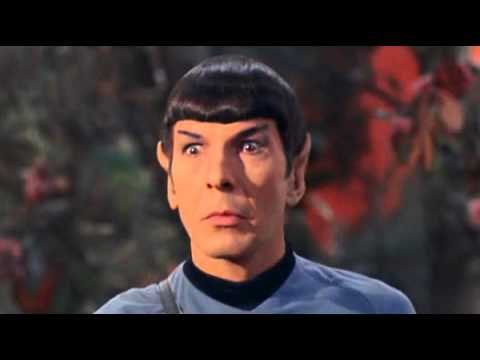

In [71]:
for Id in missing.full_imdbid:
    movie = omdb.imdbid(Id, tomatoes=False, timeout=5)
    movie_set  = pd.DataFrame(movie, columns=movie.keys())
    df = pd.concat([df, movie_set], axis =0, sort=False)
    
    
#play lenord Nemoy saying "beep" for 4 hours
from IPython.display import YouTubeVideo
YouTubeVideo("BE9b3IdTCiY",autoplay=True)

In [73]:
df.shape

(44525, 29)

In [74]:
df = df.drop_duplicates(subset='title')

In [78]:
df.to_csv('scrapedfromimdb.csv')

In [80]:
df.shape

(25634, 29)

In [79]:
df.columns

Index(['title', 'year', 'rated', 'released', 'runtime', 'genre', 'director',
       'writer', 'actors', 'plot', 'language', 'country', 'awards', 'poster',
       'ratings', 'metascore', 'imdb_rating', 'imdb_votes', 'imdb_id', 'type',
       'dvd', 'box_office', 'production', 'website', 'response',
       'total_seasons', 'season', 'episode', 'series_id'],
      dtype='object')